In [1]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns

In [2]:
# sns.set_style("whitegrid")

noShow = pds.read_csv('KaggleV2-May-2016.csv')
print(noShow.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [3]:
print(noShow.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [4]:
noShow = noShow.rename(columns = {'PatientId':'PatientId', 'AppointmentID':'AppointmentID', 'Gender':'Gender', 
                                  'ScheduledDay':'ScheduledDay', 'AppointmentDay':'AppointmentDay', 
                                  'Age':'Age', 'Neighbourhood':'Neighbourhood', 'Scholarship':'Scholarship', 
                                  'Hipertension':'Hypertension', 'Diabetes':'Diabetes', 'Alcoholism':'Alcoholism', 
                                  'Handcap': 'Handcap', 'SMS_received':'SMS_received', 'No-show':'is_show'})
noShow['is_show'] = noShow['is_show'].map({'No': 1, 'Yes': 0})
noShow.head()
noShow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
is_show           110527 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


In [5]:
# print(noShow.columns)

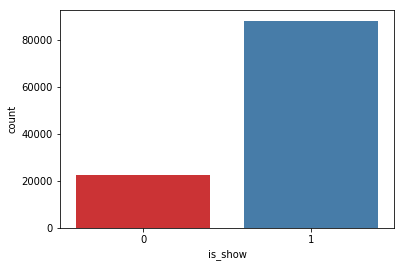

In [6]:
sns.countplot(x='is_show', data=noShow, palette='Set1')
plt.show()

In [9]:
noShow = noShow[(noShow.Age >= 0) & (noShow.Age <=100)]

In [10]:
print('Age:', sorted(noShow.Age.unique()))
print('Neighbourhood', noShow.Neighbourhood.unique())
print('Scholarship', noShow.Scholarship.unique())
print('Hypertension', noShow.Hypertension.unique())
print('Diabetes', noShow.Diabetes.unique())
print('Alcoholism', noShow.Alcoholism.unique())
print('Handcap',noShow.Handcap.unique())
print('SMS_received', noShow.SMS_received.unique())
print('is_show', noShow.is_show.unique())

Age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Neighbourhood ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA'

In [11]:
noShow.AppointmentDay = noShow.AppointmentDay.apply(np.datetime64)
noShow.ScheduledDay = noShow.ScheduledDay.apply(np.datetime64)
print(noShow.AppointmentDay.head())
print(noShow.ScheduledDay.head())

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]
0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]


In [12]:
def calculateHour(timestamp):
    timestamp = str(timestamp)
    hour = int(timestamp[11:13])
    minute = int(timestamp[14:16])
    second = int(timestamp[17:])
    return round(hour + minute/60 + second/3600)

noShow['HourOfTheDay'] = noShow.ScheduledDay.apply(calculateHour)

In [15]:
# def probStatus(dataset, group_by):
#     df = pds.crosstab(index = dataset[group_by], columns = dataset.Status).reset_index()
#     df['probShowUp'] = df['No'] / (df['No'] + df['Yes'])
#     return df[[group_by, 'probShowUp']]
def probStatus(dataset, group_by):
    df = pds.crosstab(index = dataset[group_by], columns = noShow.is_show).reset_index()
    df['probShowUp'] = df[1] / (df[0] + df[1])
    return df[[group_by, 'probShowUp']]
probStatus(noShow, 'Handcap')

is_show,Handcap,probShowUp
0,0,0.797639
1,1,0.821884
2,2,0.797814
3,3,0.769231
4,4,0.666667


In [12]:
# noShow = noShow[(noShow.Age >= 0) & (noShow.Age <=100)]
# # noShow = noShow[(noShow.Age >= 0) & (noShow.Age <= 95)]
# print(type(noShow.Age))

In [13]:
# print(noShow.columns)

In [14]:
# noShow.rename('no-Show', 'noshows')

In [15]:
# type(probStatus(noShow, 'Age'))

### sns.plt 가 왜 안되는거지?


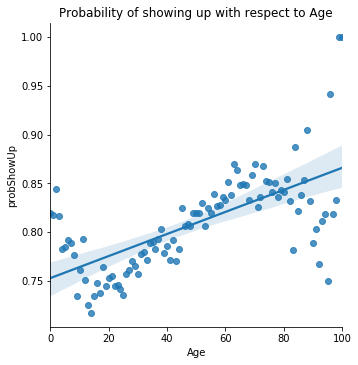

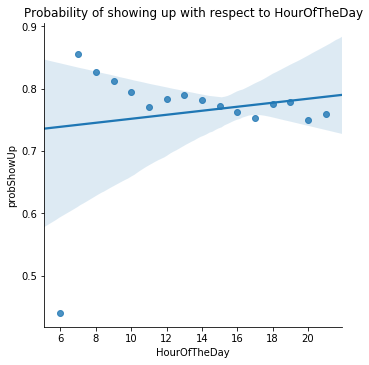

In [16]:
sns.lmplot(data = probStatus(noShow, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of showing up with respect to Age')
plt.show()

sns.lmplot(data = probStatus(noShow, 'HourOfTheDay'), x = 'HourOfTheDay', 
           y = 'probShowUp', fit_reg = True)
plt.title('Probability of showing up with respect to HourOfTheDay')
plt.show()

# sns.lmplot(data = probStatus(noShow, 'AwaitingTime'), x = 'AwaitingTime', 
#            y = 'probShowUp', fit_reg = True)
# sns.plt.title('Probability of showing up with respect to AwaitingTime')
# sns.plt.ylim(0, 1)
# sns.plt.show()

In [19]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
            for level in noShow[item].unique():
                row = {'Condition': item}
                total = len(noShow[noShow[item] == level])
                n = len(noShow[(noShow[item] == level) & (noShow.is_show == 1)])
                row.update({'Level':level, 'Probability': n / total})
                rows.append(row)
    print(total, n)
    return pds.DataFrame(rows)

35481 25697


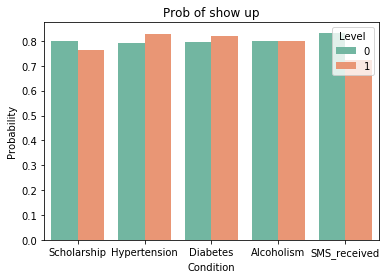

In [20]:
sns.barplot(data = probStatusCategorical(['Scholarship', 'Hypertension', 
                                          'Diabetes', 'Alcoholism', 'SMS_received']),
           x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Prob of show up')
plt.ylabel('Probability')
plt.show()

## SMS를 받은 사람이 왜 덜오냐;(나만 그런거 아니라 다른 사람들 분석도 다 이럼)

38687 30962


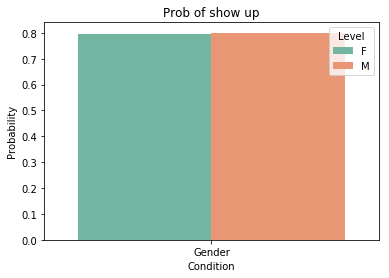

In [21]:
sns.barplot(data = probStatusCategorical(['Gender']), x = 'Condition', y = 'Probability', 
            hue = 'Level', palette = 'Set2')
plt.title('Prob of show up')
plt.ylabel('Probability')
plt.show()

3 2


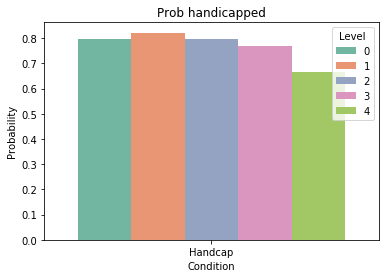

In [22]:
sns.barplot(data=probStatusCategorical(['Handcap']), x = 'Condition', y = 'Probability', 
            hue = 'Level', palette = 'Set2')
plt.title('Prob handicapped')
plt.ylabel('Probability')
plt.show()

In [23]:
print(noShow.Neighbourhood.unique())

['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO' 'DO MOSCOSO'
 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA' 'ILHA DO FRADE'
 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO' 'BOA VISTA'
 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA' 'BARRO VERMELHO'
 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE' 'ENSEADA DO SUÁ'
 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH' 'SANTA TEREZA' 'CRUZAMENTO'
 'ILHA DO PRÍNCIPE' 'ROMÃO' 'COMDUSA' 

In [24]:
# sns.barplot(data = probStatusCategorical(['Neighbourhood']), x = 'Condition', y = 'Probability', 
#            hue = 'Level', palette = 'Set3')
# plt.title('Prob by neighborhood')
# plt.ylabel('Probability')
# plt.show()

2
1
2
1
2
1
2
1
[{'Condition': 'Diabetes', 'Probability': 0.46461209944371995}, {'Condition': 'Hypertension', 'Probability': 0.4526464267448176}, {'Condition': 'Alcoholism', 'Probability': 0.4993293725379223}, {'Condition': 'Scholarship', 'Probability': 0.5516020514742662}]


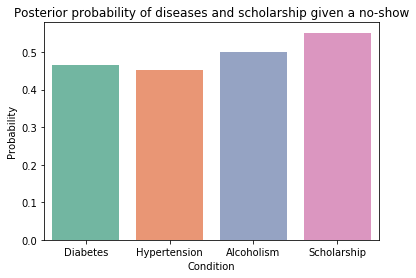

In [25]:
def posteriorNoShow(condition):
    levels = list(noShow[condition].unique())
    print(len(levels))
    if condition not in ['Gender']: 
        levels.remove(0)
        print(len(levels))
    rows = []
    for level in levels:
        p = len(noShow[noShow[condition] == level]) / len(noShow)
        p1 = len(noShow[(noShow[condition] == level) & (noShow['is_show'] == 0)]) / len(
            noShow[noShow['is_show'] == 0])
        p2 = len(noShow[(noShow[condition] == level) & (noShow['is_show'] == 1)])  / len(
            noShow[noShow['is_show'] == 1])
        if len(levels) > 1:
            rows.append({'Levels': level, 
                         'Probability': (p * p1) / (p * p1 + p * p2)})
        else:
            rows.append({'Condition': condition,
                         'Probability': (p * p1) / (p * p1 + p * p2)})
    return rows
    
    
# print(type(noShow.is_show[0]))
# print(type(noShow.Diabetes[0]))

# levels = list(noShow['Diabetes'].unique())
# for level in levels:
#     cola = len(noShow[(noShow['Diabetes'] == level)]) / len(noShow)
#     p1 = len(noShow['is_show'] == 0)
#     p1 = len(noShow[(noShow['Diabetes'] == level) & (noShow['is_show'] == 0)])
#     p1 = len(noShow[(noShow['Diabetes'] == level) & (noShow['is_show'] == 0)]) / len(
#         noShow[noShow['is_show'] == 0])
#     print(cola, p1)



# print(list(noShow['Diabetes'].unique()))
# print(len(noShow[(noShow['Diabetes'] == level)]))
# posteriorNoShow('Diabetes')
# posteriorNoShow('Diabetes')

tuples = []
tuples.extend(posteriorNoShow('Diabetes'))
tuples.extend(posteriorNoShow('Hypertension'))
tuples.extend(posteriorNoShow('Alcoholism'))
# tuples.extend(posteriorNoShow('Tuberculosis'))
# tuples.extend(posteriorNoShow('Smokes'))
tuples.extend(posteriorNoShow('Scholarship'))
print(tuples)

sns.barplot(data = pds.DataFrame(tuples)[['Condition', 'Probability']], 
            x = 'Condition', y = 'Probability', palette = 'Set2')
plt.title('Posterior probability of diseases and scholarship given a no-show')
plt.ylabel('Probability')
plt.show()

In [26]:
print(type(0))

<class 'int'>


In [27]:
def dayToNumber(day):
    if day == 'Monday': 
        return 0
    if day == 'Tuesday': 
        return 1
    if day == 'Wednesday': 
        return 2
    if day == 'Thursday': 
        return 3
    if day == 'Friday': 
        return 4
    if day == 'Saturday': 
        return 5
    if day == 'Sunday': 
        return 6

noShow.Gender = noShow.Gender.apply(lambda x: 1 if x == 'M' else 0)
# noShow.DayOfTheWeek = noShow.DayOfTheWeek.apply(dayToNumber)
noShow.is_show = noShow.is_show.apply(lambda x: 1 if x == 'Show-Up' else 0)

### 뭐지??? labels_train = noShow.Status[:110527] 자꾸 'DataFrame' object has no attribute 'Status'
원본 코드에서 Status가 is_show였어... 이거때문에 계속 오류났음

In [28]:
feature_train = noShow[[ 'Gender', 'Age', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'is_show']].iloc[:110527]
labels_train = noShow.is_show[:110527]
feature_test = noShow[[ 'Gender', 'Age', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'is_show']].iloc[:110527]
labels_test = noShow.is_show[:110527]

In [29]:
# from sklearn.metrics import accuracy_score
# from sklearn.naive_bayes import MultinomialNB

# clf =  MultinomialNB().fit(feature_train, labels_train)
# print('Accuracy:', round(accuracy_score(labels_test, 
#                                         clf.predict(feature_test)), 2) * 100, '%')
# 테스트데이터가 없음

In [ ]:
labels_